In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\Dhruv Kumar Jha\Downloads\Optimal Allocation of Stocks\StockData.csv')
data

,DATE,INDIGO,ICICI,Jet_Airways,SBI,TATA Chem,TATA Comm,HDFC,Bajaj Finance,KOTAK,Reliance
0,01-01-2019,1165.599976,363.750000,280.799988,299.600006,705.299988,522.250000,2009.000000,2656.850098,1250.449951,1110.473877
1,02-01-2019,1161.000000,364.600006,263.549988,293.899994,700.849976,521.349976,1980.650024,2614.050049,1240.599976,1096.010864
2,03-01-2019,1156.550049,363.250000,247.199997,291.100006,694.450012,536.000000,1936.849976,2586.199951,1235.250000,1082.489136
3,04-01-2019,1143.199951,365.200012,245.199997,297.649994,698.450012,531.450012,1972.599976,2576.050049,1247.949951,1088.333740
4,07-01-2019,1113.750000,367.700012,246.199997,296.299988,699.900024,528.849976,1972.900024,2553.600098,1246.599976,1094.376465
...,...,...,...,...,...,...,...,...,...,...,...
236,23-12-2019,1300.349976,541.299988,25.250000,332.399994,667.900024,386.250000,2422.649902,4160.000000,1704.900024,1556.644531
237,24-12-2019,1306.949951,541.099976,26.500000,331.450012,682.799988,395.549988,2412.750000,4139.500000,1711.550049,1531.928833
238,26-12-2019,1321.949951,538.750000,27.799999,329.850006,668.599976,391.000000,2414.100098,4187.100098,1694.250000,1501.170410
239,27-12-2019,1340.050049,549.400024,29.150000,337.250000,667.500000,391.200012,2444.149902,4252.649902,1685.599976,1527.867310


In [4]:
data.drop(['DATE'], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INDIGO         241 non-null    float64
 1   ICICI          241 non-null    float64
 2   Jet_Airways    241 non-null    float64
 3   SBI            241 non-null    float64
 4   TATA Chem      241 non-null    float64
 5   TATA Comm      241 non-null    float64
 6   HDFC           241 non-null    float64
 7   Bajaj Finance  241 non-null    float64
 8   KOTAK          241 non-null    float64
 9   Reliance       241 non-null    float64
dtypes: float64(10)
memory usage: 19.0 KB


In [6]:
# Percentage daily return
pct = data.pct_change()
pct.head()

,INDIGO,ICICI,Jet_Airways,SBI,TATA Chem,TATA Comm,HDFC,Bajaj Finance,KOTAK,Reliance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.003946,0.002337,-0.061432,-0.019025,-0.006309,-0.001723,-0.014111,-0.016109,-0.007877,-0.013024
2,-0.003833,-0.003703,-0.062038,-0.009527,-0.009132,0.028100,-0.022114,-0.010654,-0.004312,-0.012337
3,-0.011543,0.005368,-0.008091,0.022501,0.005760,-0.008489,0.018458,-0.003925,0.010281,0.005399
4,-0.025761,0.006846,0.004078,-0.004536,0.002076,-0.004892,0.000152,-0.008715,-0.001082,0.005552


### Calculating the covariance matrix for the stocks :

In [7]:
cov_matrix = pct.cov()
cov_matrix

,INDIGO,ICICI,Jet_Airways,SBI,TATA Chem,TATA Comm,HDFC,Bajaj Finance,KOTAK,Reliance
INDIGO,0.000617,0.000057,-0.000147,0.000048,0.000011,0.000059,0.000056,0.000089,0.000050,0.000045
ICICI,0.000057,0.000322,0.000160,0.000241,0.000102,0.000100,0.000115,0.000190,0.000111,0.000067
Jet_Airways,-0.000147,0.000160,0.006872,0.000208,0.000177,-0.000058,0.000102,0.000165,0.000005,0.000074
SBI,0.000048,0.000241,0.000208,0.000480,0.000122,0.000158,0.000152,0.000208,0.000115,0.000087
TATA Chem,0.000011,0.000102,0.000177,0.000122,0.000252,0.000097,0.000052,0.000096,0.000051,0.000015
TATA Comm,0.000059,0.000100,-0.000058,0.000158,0.000097,0.000993,0.000079,0.000102,0.000070,0.000040
HDFC,0.000056,0.000115,0.000102,0.000152,0.000052,0.000079,0.000220,0.000132,0.000097,0.000034
Bajaj Finance,0.000089,0.000190,0.000165,0.000208,0.000096,0.000102,0.000132,0.000416,0.000142,0.000071
KOTAK,0.000050,0.000111,0.000005,0.000115,0.000051,0.000070,0.000097,0.000142,0.000193,0.000053
Reliance,0.000045,0.000067,0.000074,0.000087,0.000015,0.000040,0.000034,0.000071,0.000053,0.000292


### Mean return:

In [8]:
pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INDIGO         240 non-null    float64
 1   ICICI          240 non-null    float64
 2   Jet_Airways    240 non-null    float64
 3   SBI            240 non-null    float64
 4   TATA Chem      240 non-null    float64
 5   TATA Comm      240 non-null    float64
 6   HDFC           240 non-null    float64
 7   Bajaj Finance  240 non-null    float64
 8   KOTAK          240 non-null    float64
 9   Reliance       240 non-null    float64
dtypes: float64(10)
memory usage: 19.0 KB


In [9]:
ind_er = pct.mean()*240
ind_er

INDIGO           0.216268
ICICI            0.440757
Jet_Airways     -1.585271
SBI              0.166892
TATA Chem       -0.028061
TATA Comm       -0.166241
HDFC             0.219995
Bajaj Finance    0.517981
KOTAK            0.324503
Reliance         0.354910
dtype: float64

### Portfolio return:

In [12]:
w = [0.1, 0.2, 0.05, 0.02, 0.1, 0.1, 0.05, 0.21, 0.07, 0.1] #Taking any random weight
port_er = (w*ind_er).sum()
port_er

0.19240409932213892

### Volatility :

In [13]:
# Volatility is given by the annual standard deviation.
ann_sd = pct.std().apply(lambda x: x*np.sqrt(240))
ann_sd

INDIGO           0.384953
ICICI            0.277820
Jet_Airways      1.284217
SBI              0.339468
TATA Chem        0.246118
TATA Comm        0.488268
HDFC             0.229976
Bajaj Finance    0.316035
KOTAK            0.215026
Reliance         0.264654
dtype: float64

In [14]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
INDIGO,0.216268,0.384953
ICICI,0.440757,0.277820
Jet_Airways,-1.585271,1.284217
SBI,0.166892,0.339468
TATA Chem,-0.028061,0.246118
TATA Comm,-0.166241,0.488268
HDFC,0.219995,0.229976
Bajaj Finance,0.517981,0.316035
KOTAK,0.324503,0.215026
Reliance,0.354910,0.264654


### Plotting returns vs volatility for 1000 different portfolios with random weights:

In [15]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = 10
num_portfolios = 1000
rf = 0.04 # risk factor = 4%

In [16]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights. 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()  # Portfolio Variance
    sd = np.sqrt(var)                                                       # Daily standard deviation
    ann_sd = sd*np.sqrt(240)                                                # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    ratio = np.subtract(p_ret,rf)
    sharpe_ratio = np.divide(ratio, p_vol)

In [17]:
d = {'Returns':p_ret, 'Volatility':p_vol, 'Sharpe Ratio':sharpe_ratio }

for counter, symbol in enumerate(pct.columns.tolist()):
    #print(counter, symbol)
    d[symbol+' weight'] = [w[counter] for w in p_weights]

In [18]:
portfolios  = pd.DataFrame(d)
portfolios # Dataframe of the 1000 portfolios created

,Returns,Volatility,Sharpe Ratio,INDIGO weight,ICICI weight,Jet_Airways weight,SBI weight,TATA Chem weight,TATA Comm weight,HDFC weight,Bajaj Finance weight,KOTAK weight,Reliance weight
0,-0.004410,0.229371,-0.193615,0.131913,0.131591,0.111058,0.161765,0.060058,0.143304,0.095449,0.034912,0.051691,0.078258
1,-0.110104,0.300602,-0.499343,0.009206,0.161952,0.180236,0.162914,0.053282,0.134480,0.151161,0.084958,0.009521,0.052289
2,0.026103,0.233150,-0.059605,0.001877,0.077031,0.124196,0.144205,0.086229,0.049401,0.105353,0.068177,0.171626,0.171905
3,-0.005685,0.218089,-0.209479,0.114095,0.048244,0.116572,0.063051,0.121479,0.074622,0.207368,0.049105,0.181275,0.024190
4,-0.013458,0.229680,-0.232750,0.141478,0.002170,0.119362,0.084271,0.146390,0.126790,0.035738,0.172345,0.087284,0.084172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.030980,0.221679,-0.040688,0.084553,0.182711,0.114594,0.087675,0.040147,0.111171,0.093396,0.001088,0.109821,0.174844
996,0.036575,0.217229,-0.015766,0.112031,0.033729,0.102721,0.115551,0.037098,0.150877,0.040697,0.113741,0.160987,0.132569
997,0.177677,0.194020,0.709604,0.163396,0.069159,0.051166,0.167492,0.031273,0.038798,0.172545,0.159002,0.006800,0.140370
998,0.122756,0.196167,0.421866,0.153490,0.125928,0.064559,0.008870,0.024710,0.147948,0.194153,0.131028,0.110702,0.038613


### Returns vs Volatility plot:

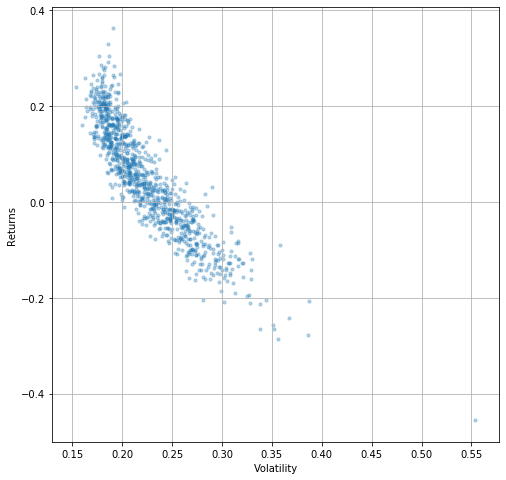

In [19]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[8,8])

### Minimum volatility (left most point):

In [20]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                 0.240599
Volatility              0.154065
Sharpe Ratio            1.302041
INDIGO weight           0.055733
ICICI weight            0.037869
Jet_Airways weight      0.004217
SBI weight              0.011206
TATA Chem weight        0.161714
TATA Comm weight        0.041536
HDFC weight             0.126070
Bajaj Finance weight    0.050634
KOTAK weight            0.237350
Reliance weight         0.273672
Name: 316, dtype: float64

Text(0, 0.5, 'Returns')

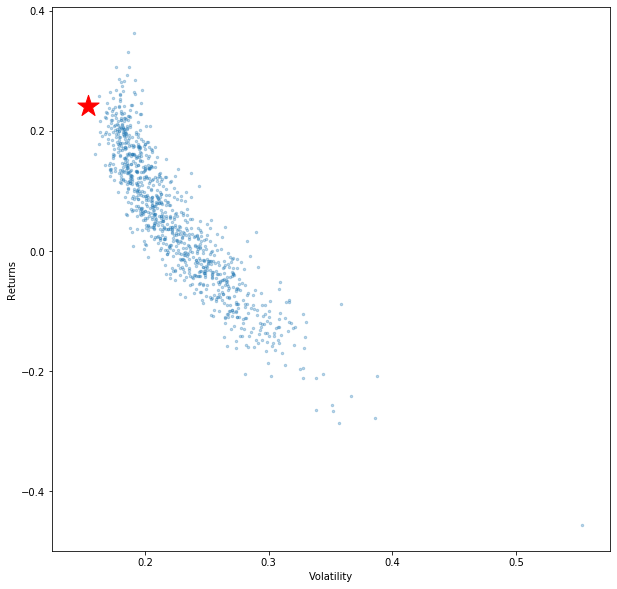

In [21]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=6, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

## Optimal Risky Portfolio

In [22]:
# Finding the optimal portfolio
optimal_risky_port = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]
optimal_risky_port

Returns                 0.362404
Volatility              0.190650
Sharpe Ratio            1.691080
INDIGO weight           0.062690
ICICI weight            0.200298
Jet_Airways weight      0.001226
SBI weight              0.069170
TATA Chem weight        0.031401
TATA Comm weight        0.023911
HDFC weight             0.008534
Bajaj Finance weight    0.265692
KOTAK weight            0.108951
Reliance weight         0.228127
Name: 497, dtype: float64

### Plotting optimal portfolio:

Text(0, 0.5, 'Returns')

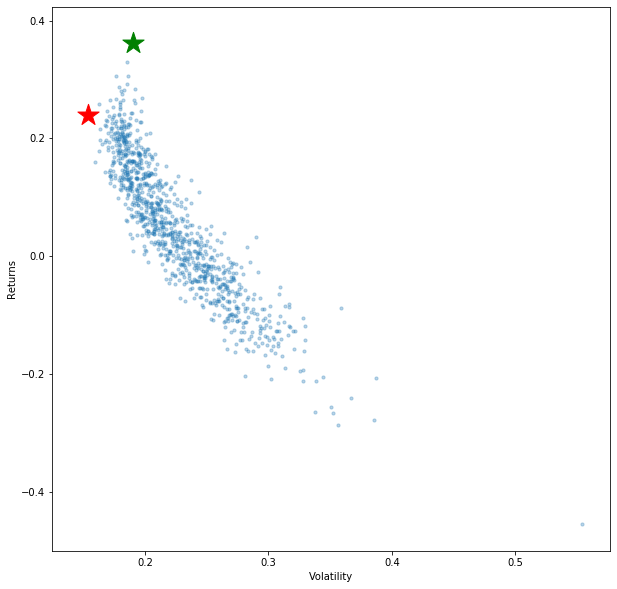

In [23]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

###  VAR by Monte Carlo simulation:

In [24]:
ex_rtn = optimal_risky_port[0]
varsigma = optimal_risky_port[1]

#### Range of returns in a year

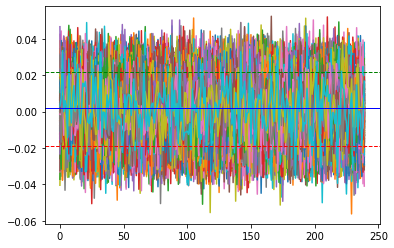

In [25]:
from scipy.stats import norm
import math
Time = 240 #number of working days in my dataset
lt_price=[]
final_res=[]
for i in range(1000): #1000 runs of simulation
  returns =                     (np.random.normal(ex_rtn/Time,varsigma/math.sqrt(Time),Time))
  plt.plot(returns)
plt.axhline(np.percentile(returns,5), color='r', linestyle='dashed', linewidth=1)
plt.axhline(np.percentile(returns,95), color='g', linestyle='dashed', linewidth=1)
plt.axhline(np.mean(returns), color='b', linestyle='solid', linewidth=1)
plt.show()

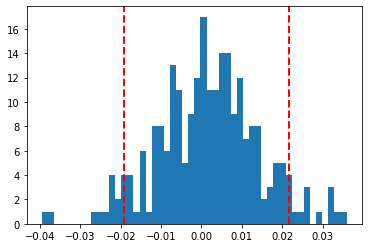

In [26]:
plt.hist(returns,bins=50)
plt.axvline(np.percentile(returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(returns,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [27]:
#VaR
print(np.percentile(returns,5))
print(np.percentile(returns,95))
pvalue = 1000 #portfolio value
print('Amount required to cover minimum losses for one year is ' + str(pvalue* - np.percentile(returns,5)))

-0.019154013624506354
0.021733687962774324
Amount required to cover minimum losses for one year is 19.154013624506355
